# Unidad 5: Caso práctico

In [3]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


# Red neuronal con Theano.
Implementar y entrenar con Theano una red neuronal que reproduzca una operación XOR de tres entradas, es decir que reproduzca la tabla:

| Entrada 1	| Entrada 2	| Entrada 3	| Salida |
|-----------|-----------|-----------|--------|
| 0 | 0 | 0 | 0 |
| 0	| 0	| 1	| 1 |
| 0	| 1	| 0	| 1 |
| 0	| 1	| 1	| 0 |
| 1	| 0	| 0	| 1 |
| 1	| 0	| 1	| 0 |
| 1	| 1	| 0	| 0 |
| 1	| 1	| 1	| 1 |

En este caso tenemos tres entradas, por lo que vamos a utilizar una capa con tres neuronas para intentar predecir el resultado. En el diseño de la red neuronal se ha de tener en cuenta que los vectores de peso tienen que tener tres elementos. Un ejemplo de red neuronal para este problema puede ser de la forma

![Modelo red neuronal](U5_Caso.001.jpeg)

Donde se han omitido el nombre de los pesos para simplificar la gráfica. Ahora se puede definir la red.

In [4]:
import theano
import theano.tensor as T

In [5]:
x = T.matrix('x')
w1 = theano.shared(np.array([-1, 0, 1], dtype = theano.config.floatX))
w2 = theano.shared(np.array([0, 1, -1], dtype = theano.config.floatX))
w3 = theano.shared(np.array([1, -1, 1], dtype = theano.config.floatX))
w4 = theano.shared(np.array([1, 2, 3], dtype = theano.config.floatX))
b1 = theano.shared(1.)
b2 = theano.shared(1.)
learning_rate = 0.01

a1 = 1 / (1 + T.exp(-T.dot(x, w1) - b1))
a2 = 1 / (1 + T.exp(-T.dot(x, w2) - b1))
a3 = 1 / (1 + T.exp(-T.dot(x, w3) - b1))
x2 = T.stack([a1, a2, a3], axis = 1)

a4 = 1 / (1 + T.exp(-T.dot(x2, w4) - b2))

Ahora se ha de calcular la función que permite actualizar las variables compartidas.

In [6]:
a_hat = T.vector('a_hat')
cost = -(a_hat * T.log(a4) + (1 - a_hat) * T.log(1 - a4)).sum()
dw1, dw2, dw3, dw4, db1, db2 = T.grad(cost, [w1, w2, w3, w4, b1, b2])

train = theano.function(
    inputs = [x, a_hat],
    outputs = [a4, cost],
    updates = [
        [w1, w1 - learning_rate * dw1],
        [w2, w2 - learning_rate * dw2],
        [w3, w3 - learning_rate * dw3],
        [w4, w4 - learning_rate * dw4],
        [b1, b1 - learning_rate * db1],
        [b2, b2 - learning_rate * db2]
    ]
)

Con esto se puede proceder al entrenamiento de la red.

Los resultados de la red son:
El resultado para [0, 0, 0] es 0.00
El resultado para [0, 1, 0] es 0.99
El resultado para [1, 0, 0] es 0.99
El resultado para [1, 1, 0] es 0.01
El resultado para [0, 0, 1] es 0.99
El resultado para [0, 1, 1] es 0.01
El resultado para [1, 0, 1] es 0.01
El resultado para [1, 1, 1] es 1.00
El vector w1 es [-8.68, 5.62, 5.19]
El vector w2 es [3.98, 4.10, 5.19]
El vector w3 es [6.69, -10.29, 5.19]
El vector w4 es [10.29, 10.49, 5.19]
El valor del bias 1 es -1.06
El valor del bias 2 es -15.36


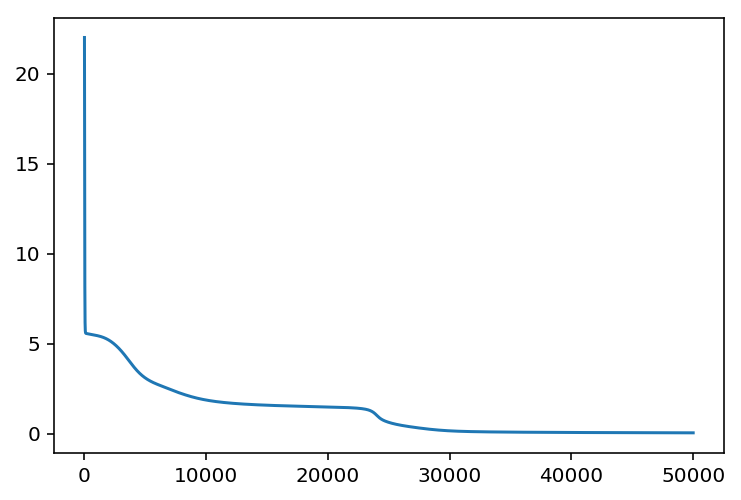

In [7]:
inputs = [[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 0], [0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]]
outputs = [0, 1, 1, 0, 1, 0, 0, 1]

# Iteramos sobre el conjunto de entrenamiento 
cost = []
for iteration in range(50000):
    pred, cost_iter = train(inputs, outputs)
    cost.append(cost_iter)
    
# Se imprimen los resultados por pantalla
print('Los resultados de la red son:')
for i in range(len(inputs)):
    print('El resultado para [%d, %d, %d] es %.2f' % (inputs[i][0], inputs[i][1], inputs[i][2], pred[i]))

# Resultados
print
print('El vector w1 es [%.2f, %.2f, %.2f]' % (w1.get_value()[0], w1.get_value()[1], w1.get_value()[2]))
print('El vector w2 es [%.2f, %.2f, %.2f]' % (w2.get_value()[0], w2.get_value()[1], w1.get_value()[2]))
print('El vector w3 es [%.2f, %.2f, %.2f]' % (w3.get_value()[0], w3.get_value()[1], w1.get_value()[2]))
print('El vector w4 es [%.2f, %.2f, %.2f]' % (w4.get_value()[0], w4.get_value()[1], w1.get_value()[2]))
print('El valor del bias 1 es %.2f' % b1.get_value())
print('El valor del bias 2 es %.2f' % b2.get_value())

# Función de esfuerzo en función del número de iteraciones
plt.plot(cost)

Al revisar los resultados podemos ver que se reproducen los resultados deseados con una gran precisión. En la gráfica se puede apreciar que en este problema hay dos puntos en los que la función de esfuerzo se reduce.